Saving IMAGE OF TASK 09.jpeg to IMAGE OF TASK 09.jpeg


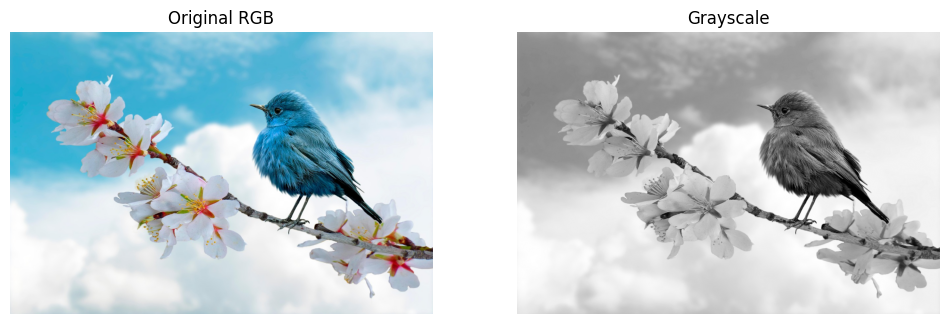

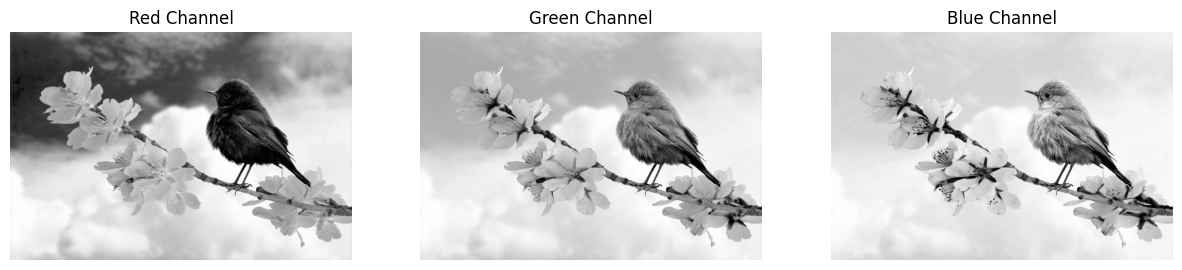

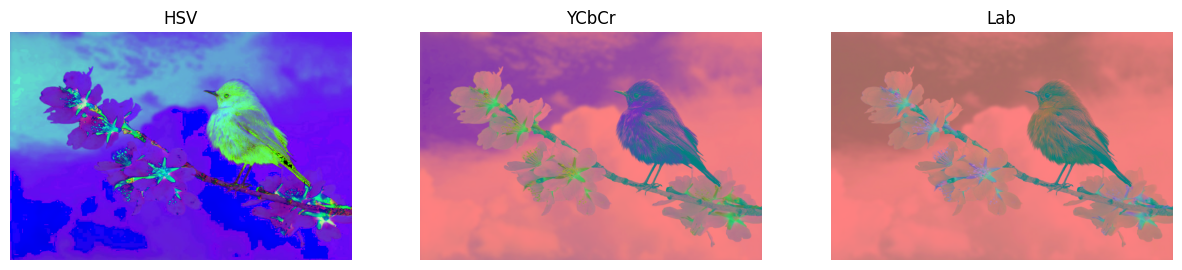

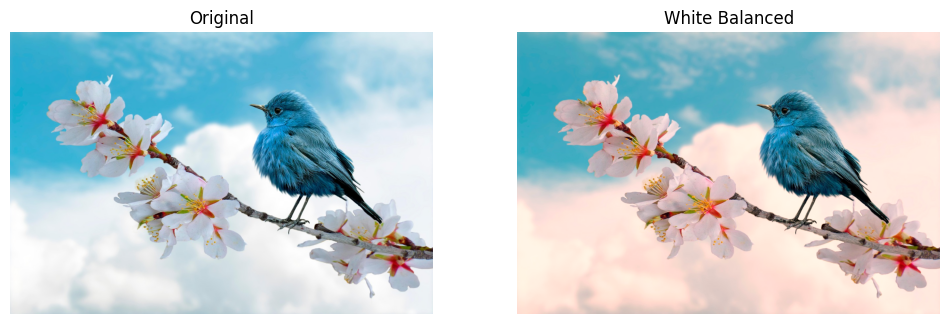

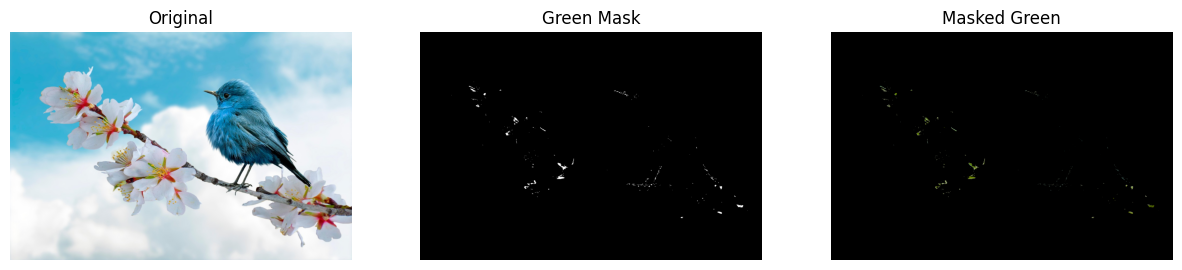

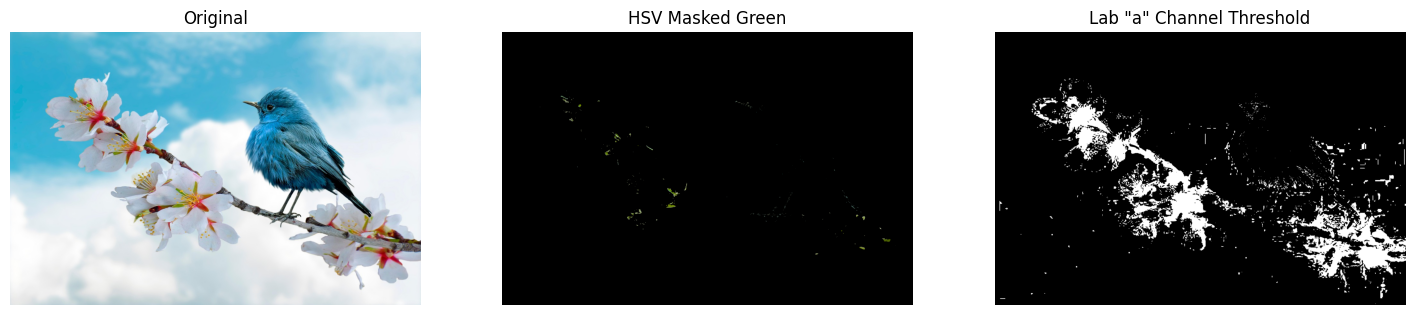

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ----------------------------------
# 1. Upload Image (Colab safe)
# ----------------------------------
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load the image in BGR
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # Convert for matplotlib

# ----------------------------------
# 2. Display Original & Grayscale
# ----------------------------------
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb); axes[0].set_title('Original RGB'); axes[0].axis('off')
axes[1].imshow(gray_img, cmap='gray'); axes[1].set_title('Grayscale'); axes[1].axis('off')
plt.show()

# ----------------------------------
# 3. Extract and Display RGB Channels
# ----------------------------------
r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(r, cmap='gray'); axes[0].set_title('Red Channel'); axes[0].axis('off')
axes[1].imshow(g, cmap='gray'); axes[1].set_title('Green Channel'); axes[1].axis('off')
axes[2].imshow(b, cmap='gray'); axes[2].set_title('Blue Channel'); axes[2].axis('off')
plt.show()

# ----------------------------------
# 4. Convert to HSV, YCbCr, Lab
# ----------------------------------
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
ycbcr_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
lab_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(hsv_img); axes[0].set_title('HSV'); axes[0].axis('off')
axes[1].imshow(ycbcr_img); axes[1].set_title('YCbCr'); axes[1].axis('off')
axes[2].imshow(lab_img); axes[2].set_title('Lab'); axes[2].axis('off')
plt.show()

# ----------------------------------
# 5. White Balance Correction (Gray World)
# ----------------------------------
avg_r, avg_g, avg_b = np.mean(img_rgb[:,:,0]), np.mean(img_rgb[:,:,1]), np.mean(img_rgb[:,:,2])
gray_avg = (avg_r + avg_g + avg_b)/3
scale_r, scale_g, scale_b = gray_avg/avg_r, gray_avg/avg_g, gray_avg/avg_b

balanced_img = np.zeros_like(img_rgb)
balanced_img[:,:,0] = np.clip(img_rgb[:,:,0]*scale_r, 0, 255)
balanced_img[:,:,1] = np.clip(img_rgb[:,:,1]*scale_g, 0, 255)
balanced_img[:,:,2] = np.clip(img_rgb[:,:,2]*scale_b, 0, 255)
balanced_img = balanced_img.astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb); axes[0].set_title('Original'); axes[0].axis('off')
axes[1].imshow(balanced_img); axes[1].set_title('White Balanced'); axes[1].axis('off')
plt.show()

# ----------------------------------
# 6. Color Masking (Green Example)
# ----------------------------------
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
green_mask = cv2.inRange(hsv_img, lower_green, upper_green)
masked_green = cv2.bitwise_and(img_rgb, img_rgb, mask=green_mask)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_rgb); axes[0].set_title('Original'); axes[0].axis('off')
axes[1].imshow(green_mask, cmap='gray'); axes[1].set_title('Green Mask'); axes[1].axis('off')
axes[2].imshow(masked_green); axes[2].set_title('Masked Green'); axes[2].axis('off')
plt.show()

# ----------------------------------
# 7. Simple Segmentation in Lab 'a' Channel
# ----------------------------------
a_channel = lab_img[:,:,1]
_, a_thresh = cv2.threshold(a_channel, 128, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(img_rgb); axes[0].set_title('Original'); axes[0].axis('off')
axes[1].imshow(masked_green); axes[1].set_title('HSV Masked Green'); axes[1].axis('off')
axes[2].imshow(a_thresh, cmap='gray'); axes[2].set_title('Lab "a" Channel Threshold'); axes[2].axis('off')
plt.show()